# Advanced Regression

## House Price Prediction

#### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. 

Building a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

#### The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation

### <span style='color:Blue'> 1. Data Understanding and Exploration </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Chanding the directory
import os
os.chdir('/Users/mitron/Downloads')
os.getcwd()

'/Users/mitron/Downloads'

In [3]:
# reading the dataset
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# summary of the dataset: 1460 rows, 81 columns
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing Values Treatment

In [6]:
#%age of missing data in all the variables  
out = round(100*(house.isnull().sum()/len(house.index)),2)
print(out[out>0])

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


In [7]:
#Dropping variables having missing more that 80%
#Alley: Type of alley access to property -  similar info holds in Street variable
#PoolQC: Pool quality
#Fence: Fence quality
#MiscFeature: Miscellaneous feature not covered in other categories
#FireplaceQu: Fireplace quality

house = house.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
out1 = house.isnull().sum()
out1[out1>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [9]:
#LotFrontage: Linear feet of street connected to property
house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [10]:
house.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='LotFrontage'>

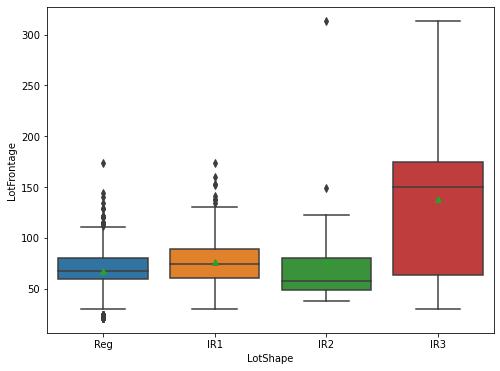

In [11]:
plt.figure(figsize=(8, 6))  
plt.subplot(1,1,1)
sns.boxplot(x = 'LotShape', y = 'LotFrontage', data = house, showmeans=True)

#IR2 is effected by outliers

In [12]:
#Checking the median value of LotFrontage based on the LotShape
Reg=house.query('LotShape == "Reg" & LotFrontage > 0')
print(Reg['LotFrontage'].median())
IR1=house.query('LotShape == "IR1" & LotFrontage > 0')
print(IR1['LotFrontage'].median())
IR2=house.query('LotShape == "IR2" & LotFrontage > 0')
print(IR2['LotFrontage'].median())
IR3=house.query('LotShape == "IR3" & LotFrontage > 0')
print(IR3['LotFrontage'].median())

67.0
74.0
57.5
150.0


In [13]:
LotShape_table = pd.pivot_table(house, index="LotShape", values="LotFrontage", aggfunc=[np.median, np.mean])
LotShape_table

,median,mean
,LotFrontage,LotFrontage
LotShape,,
IR1,74.0,76.094637
IR2,57.5,76.500000
IR3,150.0,138.428571
Reg,67.0,67.038778


In [14]:
LotShape_table.columns = ['median','mean']
LotShape_table

,median,mean
LotShape,,
IR1,74.0,76.094637
IR2,57.5,76.500000
IR3,150.0,138.428571
Reg,67.0,67.038778


In [15]:
LotShape_table.xs('IR1')['median']

74.0

In [16]:
#Testing logic

chk1=house[(house['LotFrontage'].isnull()) & (house['LotShape']=="IR3")]
chk1['LotFrontage'] = np.where((chk1['LotFrontage'].isnull()) & (chk1['LotShape']=="IR3"), 
                               LotShape_table.xs('IR3')['median'], chk1['LotFrontage'])
chk1


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1006,1007,20,RL,150.0,12155,Pave,IR3,Lvl,AllPub,Inside,...,0,0,147,0,0,3,2007,WD,Normal,163500
1260,1261,60,RL,150.0,24682,Pave,IR3,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2009,WD,Normal,181000
1348,1349,20,RL,150.0,16196,Pave,IR3,Low,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,215000


In [17]:
#Replacing missing values of LotFrontage with median value of LotFrontage based on LotShape
house['LotFrontage'] = np.where((house['LotFrontage'].isnull()) & (house['LotShape']=="Reg"), LotShape_table.xs('Reg')['median'], house['LotFrontage'])
house['LotFrontage'] = np.where((house['LotFrontage'].isnull()) & (house['LotShape']=="IR1"), LotShape_table.xs('IR1')['median'], house['LotFrontage'])
house['LotFrontage'] = np.where((house['LotFrontage'].isnull()) & (house['LotShape']=="IR2"), LotShape_table.xs('IR2')['median'], house['LotFrontage'])
house['LotFrontage'] = np.where((house['LotFrontage'].isnull()) & (house['LotShape']=="IR3"), LotShape_table.xs('IR3')['median'], house['LotFrontage'])

In [18]:
house['LotFrontage'].describe()

count    1460.000000
mean       70.382534
std        22.404624
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
# Checking - Missing values have been replaced correctly
house[(house['LotShape']=="IR3")]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
264,265,30,RM,30.0,5232,Pave,IR3,Bnk,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,73000
301,302,60,RL,66.0,16226,Pave,IR3,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2007,WD,Normal,267000
313,314,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Normal,375000
1006,1007,20,RL,150.0,12155,Pave,IR3,Lvl,AllPub,Inside,...,0,0,147,0,0,3,2007,WD,Normal,163500
1107,1108,60,RL,168.0,23257,Pave,IR3,HLS,AllPub,CulDSac,...,0,0,0,0,0,9,2006,New,Partial,274725
1127,1128,20,RL,182.0,14572,Pave,IR3,Lvl,AllPub,Corner,...,0,0,0,0,0,11,2007,WD,Family,259000
1260,1261,60,RL,150.0,24682,Pave,IR3,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2009,WD,Normal,181000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000
1348,1349,20,RL,150.0,16196,Pave,IR3,Low,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,215000
1430,1431,60,RL,60.0,21930,Pave,IR3,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Normal,192140


In [20]:
out1 = house.isnull().sum()
out1[out1>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [21]:
# Based on the data definition, for all the Garage varaibales, NA means there is no garage in that building and 
# the GarageCars and GarageArea is also zero
# Replacing the missing data with meangingfull value

house['GarageType']   = np.where((house['GarageType'].isnull()),'No Garage', house['GarageType'])
house['GarageYrBlt']  = np.where((house['GarageYrBlt'].isnull()),0, house['GarageYrBlt'])
house['GarageFinish'] = np.where((house['GarageFinish'].isnull()),'No Garage', house['GarageFinish'])
house['GarageQual']   = np.where((house['GarageQual'].isnull()),'No Garage', house['GarageQual'])
house['GarageCond']   = np.where((house['GarageCond'].isnull()),'No Garage', house['GarageCond'])

In [22]:
out1 = house.isnull().sum()
out1[out1>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
dtype: int64

In [23]:
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [24]:
house['MasVnrType']   = np.where((house['MasVnrType'].isnull()),'None', house['MasVnrType'])
house['MasVnrArea']   = np.where((house['MasVnrArea'].isnull()),0, house['MasVnrArea'])

In [25]:
#As per the data definition, if basement info is NA, it means there is No Basement in that building/house.
house['BsmtQual']   = np.where((house['BsmtQual'].isnull()),'No Basement', house['BsmtQual'])
house['BsmtCond']   = np.where((house['BsmtCond'].isnull()),'No Basement', house['BsmtCond'])
house['BsmtExposure']   = np.where((house['BsmtExposure'].isnull()),'No Basement', house['BsmtExposure'])
house['BsmtFinType1']   = np.where((house['BsmtFinType1'].isnull()),'No Basement', house['BsmtFinType1'])
house['BsmtFinType2']   = np.where((house['BsmtFinType2'].isnull()),'No Basement', house['BsmtFinType2'])

In [26]:
out1 = house.isnull().sum()
out1[out1>0]

Electrical    1
dtype: int64

In [27]:
#Droping records where Electrical System information is missing
house = house[~(house.Electrical.isnull())]

In [28]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

### <span style='color:Blue'> 2. Data Visulaization </span>

In [29]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [30]:
house_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<Figure size 576x360 with 0 Axes>

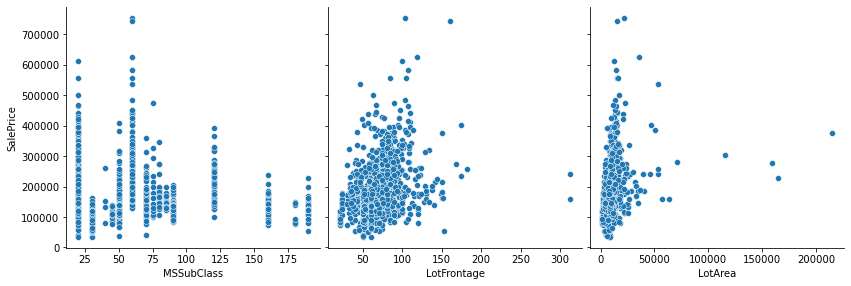

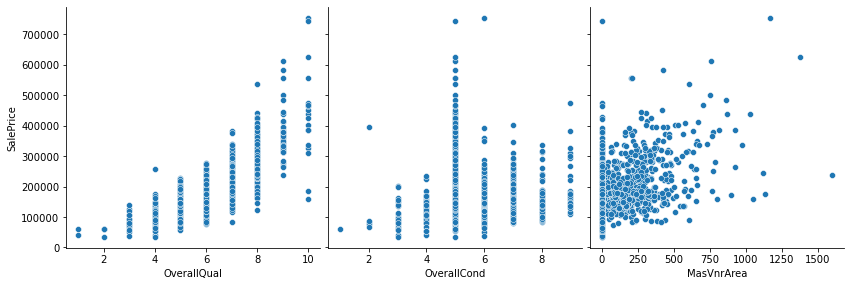

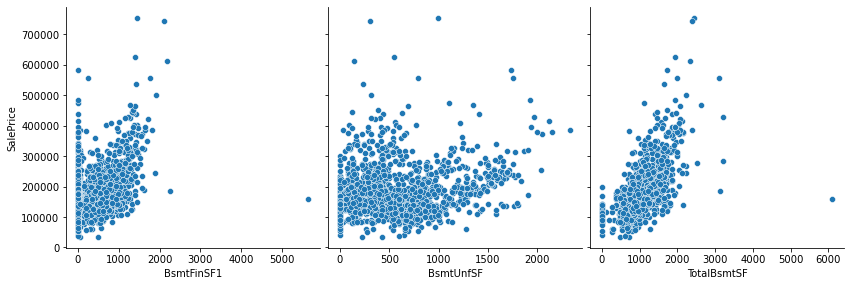

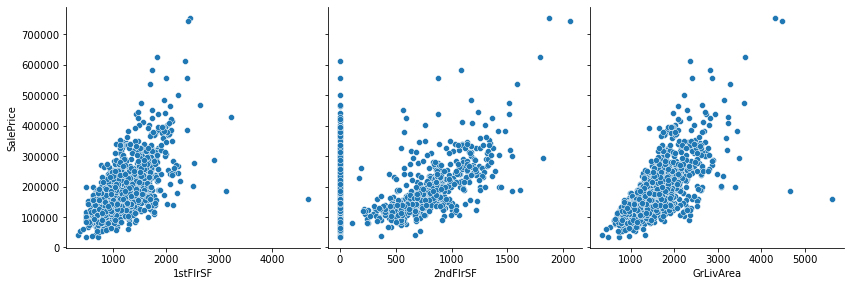

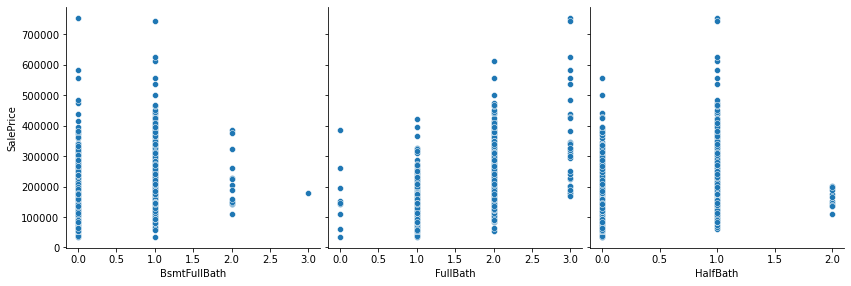

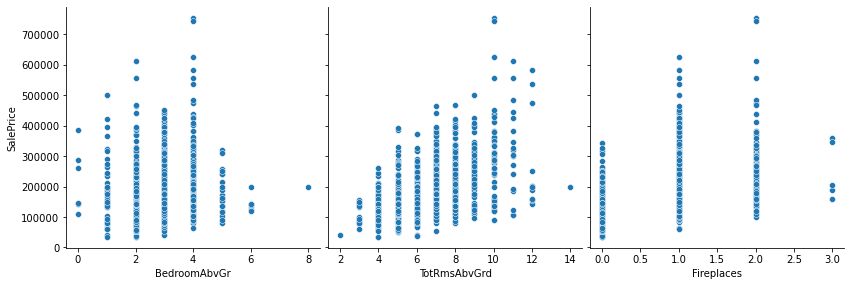

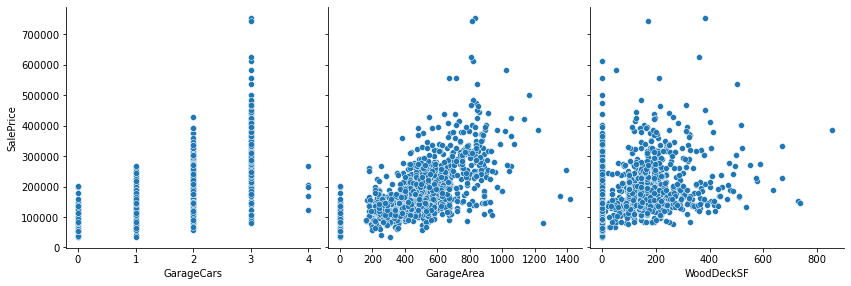

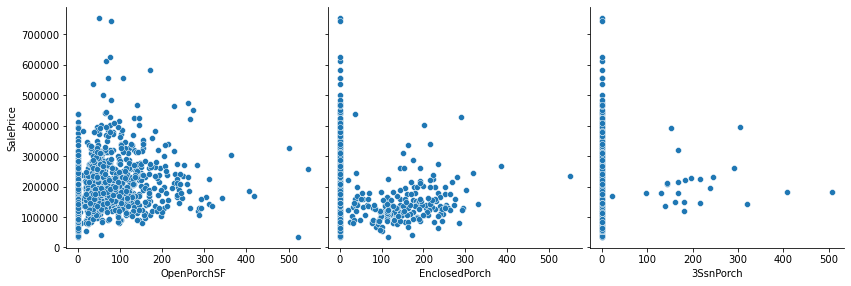

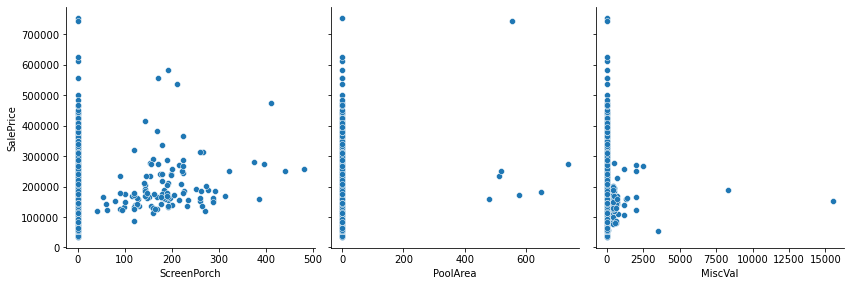

In [31]:
plt.figure(figsize=(8,5))
sns.pairplot(house_numeric, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_numeric, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_numeric, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_numeric, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_numeric, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_numeric, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_numeric, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_numeric, x_vars=['OpenPorchSF', 'EnclosedPorch','3SsnPorch'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_numeric, x_vars=['ScreenPorch', 'PoolArea','MiscVal'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

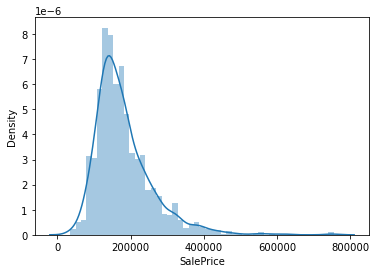

In [32]:
# SalePrice: Saling Price of a house -  the data sales  price data is right screwed. 
sns.distplot(house['SalePrice'])
plt.show()

In [33]:
#MSZoning: Identifies the general zoning classification of the sale
#Excluded all records property zones are A =Agriculture, C=Commercial & I=Industrial
#Selected only residential zone only

house=house[~(house.MSZoning.isin(['A','C (all)','I']))]
house['MSZoning'].astype('category').value_counts()

RL    1150
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [34]:
house['MSSubClass'].astype('category').value_counts()

20     534
60     299
50     140
120     87
30      67
160     63
70      59
80      57
90      52
190     29
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [35]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,...,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,730.916494,56.887509,70.385438,10524.376121,6.115252,5.582471,1971.569358,1985.034507,103.899931,445.469979,...,94.823326,46.570048,21.551415,3.435473,15.106970,2.779848,43.395445,6.313320,2007.812284,181664.710835
std,421.354997,42.275264,22.413161,10015.620536,1.373022,1.107606,30.019438,20.551315,181.192098,456.361401,...,125.604139,65.233808,60.857196,29.426965,55.911288,40.328903,497.806996,2.698955,1.326770,79202.946344
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,366.000000,20.000000,60.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163900.000000
75%,1096.000000,70.000000,79.000000,11616.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,714.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


0.10      5000
0.20      7058
0.30      8063
0.40      8800
0.50      9492
0.60     10200
0.70     11075
0.80     12213
0.90     14388
0.95     17326
0.96     18909
0.97     21624
0.98     25288
0.99     37854
1.00    215245
Name: LotArea, dtype: int64

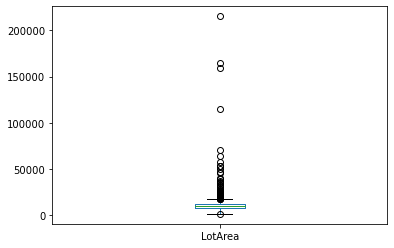

In [36]:
#LotArea: Lot size in square feet
house[house['LotArea']>0].LotArea.plot.box()
chk2 = house.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk2['LotArea']

In [37]:
chk2=house.query('LotArea > 37854')
chk2.LotArea.value_counts()

39104     1
53504     1
70761     1
53227     1
115149    1
63887     1
57200     1
45600     1
53107     1
164660    1
159000    1
215245    1
46589     1
40094     1
50271     1
Name: LotArea, dtype: int64

In [38]:
quartile_LotArea = house['LotArea'].quantile(0.99)
quartile_LotArea

37854.07999999995

In [39]:
#Removing outliers from the house dataset
house = house[~(house['LotArea']>quartile_LotArea)]

In [40]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,...,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,732.474895,56.973501,70.170153,9778.537657,6.105997,5.580893,1971.562762,1984.974198,102.537657,436.024407,...,92.638075,46.018131,21.741980,3.471409,14.996513,2.474198,43.012552,6.308926,2007.811715,180587.145049
std,421.626364,42.270397,21.413020,4247.637492,1.365993,1.108590,30.059407,20.568644,178.973659,429.632955,...,121.774050,64.256940,61.132865,29.578468,55.788574,38.527281,499.942206,2.697101,1.327986,78253.849113
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,367.250000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,734.500000,50.000000,70.000000,9451.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,381.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1097.750000,70.000000,79.000000,11494.500000,7.000000,6.000000,2001.000000,2004.000000,164.750000,705.750000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213187.500000
max,1460.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


0.10       0
0.20       0
0.30       0
0.40       0
0.50       0
0.60      17
0.70     117
0.80     205
0.90     326
0.95     448
0.96     479
0.97     567
0.98     650
0.99     782
1.00    1600
Name: MasVnrArea, dtype: int64

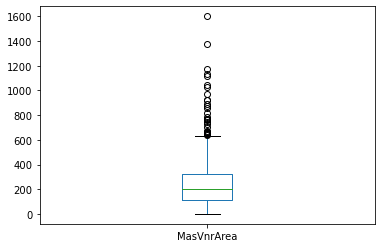

In [41]:
#MasVnrArea: Masonry veneer area in square feet
house[house['MasVnrArea']>0].MasVnrArea.plot.box()
chk2 = house.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk2['MasVnrArea']

In [42]:
chk2=house.query('MasVnrArea > 782')
chk2.MasVnrArea.value_counts()

921.0     1
1129.0    1
975.0     1
922.0     1
1378.0    1
870.0     1
860.0     1
1115.0    1
1047.0    1
1600.0    1
788.0     1
1031.0    1
816.0     1
894.0     1
1170.0    1
Name: MasVnrArea, dtype: int64

In [43]:
quartile_MasVnrArea = house['MasVnrArea'].quantile(0.99)
quartile_MasVnrArea

782.7200000000012

In [44]:
#Removing outliers from the house dataset
house = house[~(house['MasVnrArea']>quartile_MasVnrArea)]

In [45]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,...,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000
mean,733.902748,56.871036,70.036646,9735.613813,6.084567,5.585624,1971.295983,1984.843552,92.687104,433.133192,...,91.882311,46.156448,21.945736,3.508104,15.015504,2.500352,43.467230,6.313601,2007.816068,178700.727273
std,421.766965,42.277438,21.322017,4176.136873,1.346220,1.112928,30.081175,20.601759,150.343948,425.680181,...,121.443862,64.481655,61.415696,29.732335,55.852034,38.729676,502.559837,2.699246,1.328061,74565.800727
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,369.500000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,735.000000,50.000000,70.000000,9405.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,1099.500000,70.000000,79.000000,11431.500000,7.000000,6.000000,2000.000000,2004.000000,158.000000,703.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,211000.000000
max,1460.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,2188.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000


0.10       0
0.20       0
0.30       0
0.40     216
0.50     379
0.60     521
0.70     648
0.80     788
0.90    1040
0.95    1246
0.96    1283
0.97    1332
0.98    1408
0.99    1517
1.00    2188
Name: BsmtFinSF1, dtype: int64

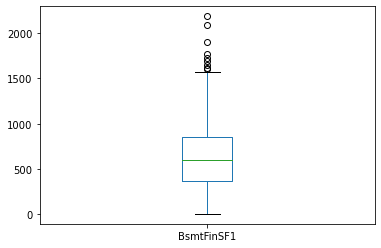

In [46]:
#BsmtFinSF1
house[house['BsmtFinSF1']>0].BsmtFinSF1.plot.box()
chk2 = house.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk2['BsmtFinSF1']

In [47]:
quartile_BsmtFinSF1= house['BsmtFinSF1'].quantile(0.99)
quartile_BsmtFinSF1

#Removing outliers from the house dataset
house = house[~(house['BsmtFinSF1']>quartile_BsmtFinSF1)]
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,...,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,734.174501,56.930199,69.947293,9708.438746,6.061254,5.591168,1970.997863,1984.685185,90.064815,419.541311,...,91.463675,45.958689,22.180199,3.545584,14.504274,2.131766,43.931624,6.309829,2007.813390,176431.874644
std,422.273862,42.285635,21.184946,4171.537075,1.327040,1.117262,30.081204,20.621852,145.723043,406.490405,...,121.425793,64.471709,61.700975,29.888628,54.639680,36.031275,505.219018,2.696349,1.327678,69914.029606
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,368.750000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,736.500000,50.000000,70.000000,9375.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,374.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160100.000000
75%,1099.250000,70.000000,79.000000,11416.250000,7.000000,6.000000,2000.000000,2004.000000,153.250000,695.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,208600.000000
max,1460.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1513.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,582933.000000


0.10      0
0.20      0
0.30      0
0.40      0
0.50      0
0.60    100
0.70    144
0.80    192
0.90    256
0.95    324
0.96    349
0.97    370
0.98    415
0.99    485
1.00    736
Name: WoodDeckSF, dtype: int64

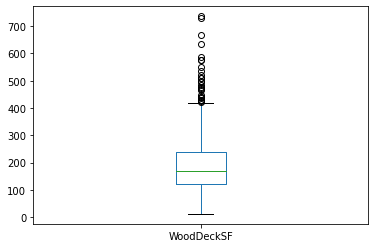

In [48]:
#WoodDeckSF: Wood deck area in square feet
house[house['WoodDeckSF']>0].WoodDeckSF.plot.box()
chk2 = house.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk2['WoodDeckSF']

In [49]:
quartile_WoodDeckSF= house['WoodDeckSF'].quantile(0.99)
quartile_WoodDeckSF

#Removing outliers from the house dataset
house = house[~(house['WoodDeckSF']>quartile_WoodDeckSF)]
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,...,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,732.838013,56.832253,69.948524,9676.544276,6.053996,5.591793,1970.932325,1984.693305,88.773218,418.845212,...,86.253420,45.472282,22.419726,3.583873,14.498920,1.623470,44.118071,6.316055,2007.813535,175917.432685
std,421.753587,42.302788,21.229653,4136.585919,1.323407,1.118210,30.138724,20.668917,143.641739,405.966992,...,110.869691,64.140887,61.990147,30.047411,54.623385,30.361939,507.832488,2.699964,1.327146,69785.936134
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,369.000000,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,734.000000,50.000000,70.000000,9360.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,374.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1098.000000,70.000000,79.000000,11394.000000,7.000000,6.000000,2000.000000,2004.000000,150.000000,692.000000,...,164.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,207500.000000
max,1459.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1513.000000,...,476.000000,547.000000,552.000000,508.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,582933.000000


0.10      0
0.20      0
0.30      0
0.40      0
0.50     24
0.60     39
0.70     55
0.80     82
0.90    130
0.95    171
0.96    189
0.97    207
0.98    235
0.99    266
1.00    547
Name: OpenPorchSF, dtype: int64

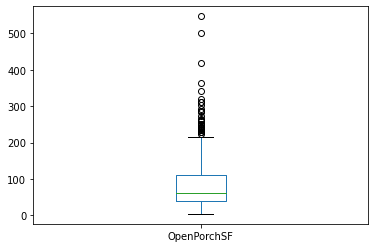

In [50]:
#OpenPorchSF: Open porch area in square feet
house[house['OpenPorchSF']>0].OpenPorchSF.plot.box()
chk2 = house.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk2['OpenPorchSF']

In [51]:
quartile_OpenPorchSF = house['OpenPorchSF'].quantile(0.99)
quartile_OpenPorchSF

266.079999999999

In [52]:
#Removing outliers from the house dataset
house = house[~(house['OpenPorchSF']>quartile_OpenPorchSF)]

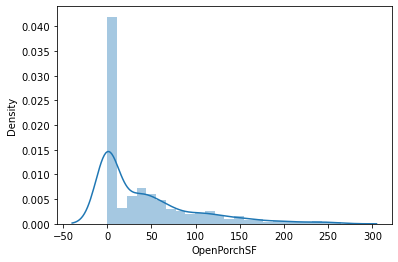

In [53]:
sns.distplot(house['OpenPorchSF'])
plt.show()

In [54]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,...,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000
mean,731.638545,56.738182,69.894909,9664.146182,6.051636,5.589818,1971.156364,1984.708364,88.946182,418.106182,...,86.617455,42.412364,22.521455,3.620364,14.070545,1.640000,43.381818,6.316364,2007.816727,175656.099636
std,422.950141,42.272559,21.184237,4132.094704,1.317593,1.115805,29.956900,20.686086,143.576616,405.326438,...,110.834754,56.196430,62.195231,30.197914,52.820190,30.515784,509.387547,2.701202,1.328178,69417.190481
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,365.500000,20.000000,60.000000,7486.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129250.000000
50%,732.000000,50.000000,70.000000,9350.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,374.000000,...,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1098.500000,70.000000,79.000000,11380.500000,7.000000,6.000000,2000.000000,2004.000000,150.500000,690.000000,...,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,207500.000000
max,1459.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1513.000000,...,476.000000,265.000000,552.000000,508.000000,440.000000,648.000000,15500.000000,12.000000,2010.000000,582933.000000


0.10      0
0.20      0
0.30      0
0.40      0
0.50      0
0.60      0
0.70      0
0.80      0
0.90    112
0.95    184
0.96    200
0.97    217
0.98    237
0.99    264
1.00    552
Name: EnclosedPorch, dtype: int64

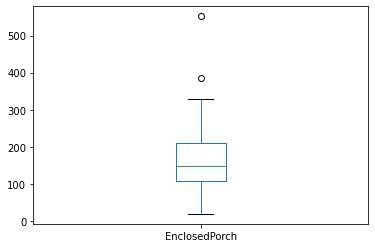

In [55]:
house[house['EnclosedPorch']>0].EnclosedPorch.plot.box()
chk2 = house.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk2['EnclosedPorch']

In [56]:
quartile_EnclosedPorch = house['EnclosedPorch'].quantile(0.99)
quartile_EnclosedPorch

264.0

In [57]:
house = house[~(house['EnclosedPorch']>quartile_EnclosedPorch)]

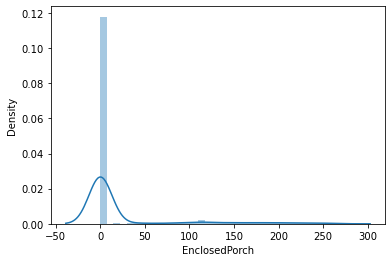

In [58]:
sns.distplot(house['EnclosedPorch'])
plt.show()

In [59]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,...,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,731.603524,56.732746,69.822687,9640.312041,6.050661,5.588106,1971.555800,1984.734949,89.528634,418.990455,...,86.818649,42.680617,19.692364,3.654919,14.204846,1.279736,43.428781,6.325991,2007.823054,175435.651982
std,422.905912,42.411777,21.064750,4104.357731,1.317241,1.116942,29.669255,20.685201,143.974719,405.255389,...,110.975198,56.344263,54.827926,30.339710,53.053865,27.360097,511.648650,2.708093,1.326372,69206.007409
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,366.250000,20.000000,60.000000,7454.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,731.500000,50.000000,70.000000,9338.500000,6.000000,5.000000,1972.000000,1993.500000,0.000000,375.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1097.750000,70.000000,79.000000,11357.000000,7.000000,6.000000,2000.750000,2004.000000,153.000000,691.500000,...,164.750000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,206975.000000
max,1459.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1513.000000,...,476.000000,265.000000,264.000000,508.000000,440.000000,648.000000,15500.000000,12.000000,2010.000000,582933.000000


In [60]:
#3SsnPorch:
#house[house['3SsnPorch']>0].3SsnPorch.plot.box()
chk2 = house.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk2['3SsnPorch']


0.10      0
0.20      0
0.30      0
0.40      0
0.50      0
0.60      0
0.70      0
0.80      0
0.90      0
0.95      0
0.96      0
0.97      0
0.98      0
0.99    168
1.00    508
Name: 3SsnPorch, dtype: int64

In [61]:
quartile_3SsnPorch= house['3SsnPorch'].quantile(0.99)
quartile_3SsnPorch

#Removing outliers from the house dataset
house = house[~(house['3SsnPorch']>quartile_3SsnPorch)]
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,...,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,733.380282,56.975537,69.731653,9608.612305,6.048184,5.581913,1971.478873,1984.612305,89.005930,417.988881,...,86.928095,42.659007,19.882135,1.108970,14.341735,1.292068,43.328391,6.318013,2007.822090,175142.135656
std,421.626607,42.508597,21.107369,4093.087145,1.320313,1.114445,29.752050,20.715256,143.945268,405.708379,...,110.910094,56.509388,55.057390,12.786276,53.290644,27.491419,513.782416,2.699952,1.327997,69151.999917
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,371.000000,20.000000,60.000000,7420.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,734.000000,50.000000,70.000000,9313.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,374.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1098.000000,70.000000,78.000000,11340.000000,7.000000,6.000000,2001.000000,2004.000000,151.000000,690.000000,...,165.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,206000.000000
max,1459.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1513.000000,...,476.000000,265.000000,264.000000,168.000000,440.000000,648.000000,15500.000000,12.000000,2010.000000,582933.000000


In [62]:
quartile_ScreenPorch= house['ScreenPorch'].quantile(0.99)
quartile_ScreenPorch

house = house[~(house['ScreenPorch']>quartile_ScreenPorch)]
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,...,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,733.829213,57.000000,69.649438,9581.286891,6.041948,5.576030,1971.558052,1984.666667,88.647940,418.065169,...,87.420225,42.534831,20.090637,1.120599,11.169288,0.916854,41.235955,6.310112,2007.826217,174710.988015
std,421.544763,42.511221,21.177862,4085.886087,1.319230,1.112837,29.752745,20.717321,143.762346,406.054835,...,111.155554,56.267447,55.307658,12.852688,43.182519,23.719971,512.319929,2.697605,1.327735,68765.254956
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,372.500000,20.000000,60.000000,7406.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,735.000000,50.000000,70.000000,9286.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,371.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1097.500000,70.000000,78.000000,11316.500000,7.000000,6.000000,2001.000000,2004.000000,149.000000,691.000000,...,165.500000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,205475.000000
max,1459.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1513.000000,...,476.000000,265.000000,264.000000,168.000000,263.000000,648.000000,15500.000000,12.000000,2010.000000,582933.000000


0.10        0
0.20        0
0.30        0
0.40        0
0.50        0
0.60        0
0.70        0
0.80        0
0.90        0
0.95        0
0.96        0
0.97      343
0.98      450
0.99      672
1.00    15500
Name: MiscVal, dtype: int64

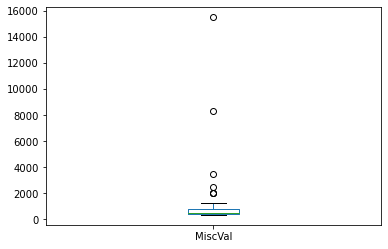

In [63]:
house[house['MiscVal']>0].MiscVal.plot.box()
chk2 = house.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk2['MiscVal']

In [64]:
quartile_MiscVal = house['MiscVal'].quantile(0.99)
quartile_MiscVal

672.8000000000065

In [65]:
house = house[~(house['MiscVal']>quartile_MiscVal)]

In [66]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,...,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,734.598032,57.036336,69.638153,9567.067373,6.044663,5.565481,1971.732021,1984.683573,88.696442,418.138531,...,87.571537,42.713096,19.927328,1.132475,11.160484,0.926571,9.576079,6.315670,2007.819076,174885.214989
std,421.714687,42.488165,21.281457,4092.023932,1.321834,1.106655,29.754159,20.722037,143.604569,406.325086,...,111.186785,56.421280,55.124714,12.920146,43.181540,23.845238,67.229608,2.706245,1.325096,68870.599516
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,372.000000,20.000000,60.000000,7388.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129000.000000
50%,737.000000,50.000000,70.000000,9262.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,371.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,1099.000000,70.000000,78.000000,11308.000000,7.000000,6.000000,2001.000000,2004.000000,149.000000,695.000000,...,166.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,206000.000000
max,1459.000000,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1513.000000,...,476.000000,265.000000,264.000000,168.000000,263.000000,648.000000,620.000000,12.000000,2010.000000,582933.000000


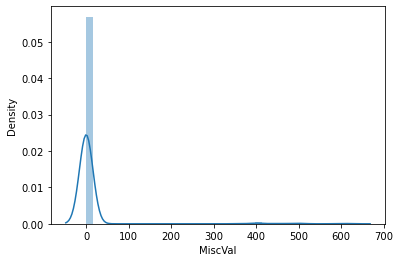

In [67]:
sns.distplot(house['MiscVal'])
plt.show()

In [68]:
house.shape

(1321, 76)

In [69]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000


In [70]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019266,-0.014975,0.012230,-0.017078,0.007080,-0.010024,-0.016728,-0.035051,-0.003580,...,-0.045724,-0.018613,0.005044,-0.015155,0.003241,0.022667,-0.055721,0.016476,-0.010053,-0.020983
MSSubClass,0.019266,1.000000,-0.387628,-0.346934,0.049908,-0.057135,0.040483,0.050320,0.026662,-0.073390,...,-0.021192,-0.005310,-0.017913,0.016855,-0.041257,-0.008055,-0.040872,-0.022527,-0.016057,-0.079651
LotFrontage,-0.014975,-0.387628,1.000000,0.549095,0.190140,-0.044236,0.115054,0.066734,0.145588,0.123567,...,0.081568,0.117385,-0.006511,0.044129,0.043450,0.013560,-0.003628,0.030739,0.006273,0.338733
LotArea,0.012230,-0.346934,0.549095,1.000000,0.134725,-0.053927,0.049660,0.013507,0.120644,0.174953,...,0.153497,0.138469,-0.012443,0.028546,0.077339,0.004282,0.003515,-0.008763,-0.036411,0.342851
OverallQual,-0.017078,0.049908,0.190140,0.134725,1.000000,-0.112052,0.593613,0.552675,0.365962,0.169498,...,0.217150,0.352815,-0.116868,0.036338,0.045478,-0.001314,-0.081711,0.089662,-0.025659,0.798751
OverallCond,0.007080,-0.057135,-0.044236,-0.053927,-0.112052,1.000000,-0.378006,0.068165,-0.127008,-0.023207,...,-0.003725,-0.066510,0.093241,-0.008051,0.039857,0.015269,0.033365,0.000555,0.045539,-0.100782
YearBuilt,-0.010024,0.040483,0.115054,0.049660,0.593613,-0.378006,1.000000,0.609407,0.292376,0.224797,...,0.229848,0.278462,-0.372026,0.011524,-0.047284,0.004809,-0.055130,0.020178,-0.018197,0.576191
YearRemodAdd,-0.016728,0.050320,0.066734,0.013507,0.552675,0.068165,0.609407,1.000000,0.144076,0.098972,...,0.220939,0.279238,-0.206263,0.011034,-0.036124,0.007438,-0.070697,0.019088,0.035518,0.537746
MasVnrArea,-0.035051,0.026662,0.145588,0.120644,0.365962,-0.127008,0.292376,0.144076,1.000000,0.183593,...,0.132580,0.175396,-0.090085,0.021525,0.060687,-0.009826,-0.055416,0.017345,0.004672,0.429673
BsmtFinSF1,-0.003580,-0.073390,0.123567,0.174953,0.169498,-0.023207,0.224797,0.098972,0.183593,1.000000,...,0.184910,0.068055,-0.098172,0.051703,0.067041,0.017084,-0.003797,-0.000167,0.027782,0.336466


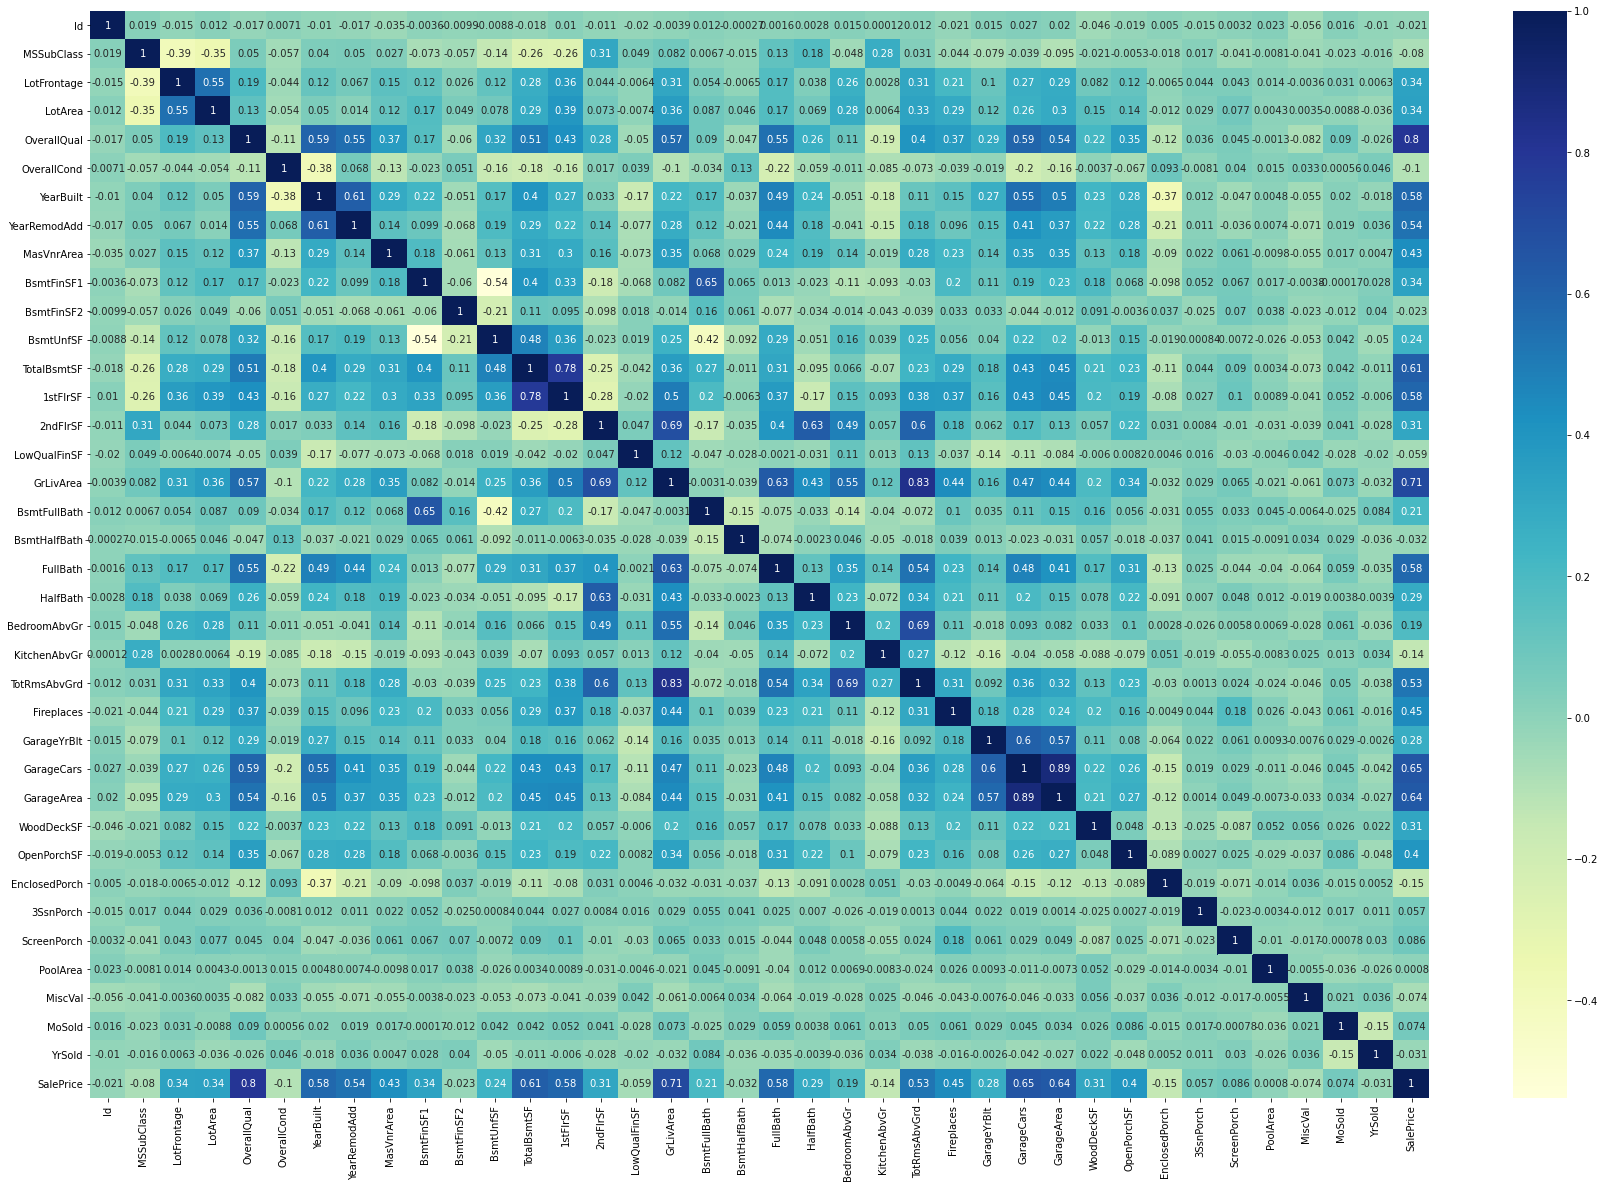

In [71]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(30,20))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

There is multicollinaerity in the data as two or more independent variables are highly correlated with one another.

#### Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%
- 1stFlrSF and TotalBsmtSF Cars show 79%

In [72]:
# Removing the highly correlated variables
house.drop(['TotRmsAbvGrd', 'GarageArea','1stFlrSF'], axis = 1, inplace = True)

In [73]:
# Check if there are any duplicate values in the dataset
house[house.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [74]:
# Check the shape of the dataframe
house.shape

(1321, 73)

### <span style='color:Blue'> 3. Data Preparation </span>

In [75]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scr

In [76]:
#Feature Scaling
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [77]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# Drop variables - ['TotRmsAbvGrd', 'GarageArea','1stFlrSF']

house[num_vars] = scaler.fit_transform(house[num_vars])

In [78]:
#Since the values of the following fields are ordered list, we shall assign values to them in sequence
# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

# house['d_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
# house['d_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
# house['d_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
# house['d_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
# house['d_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})
# house['d_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
# house['d_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
# house['d_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
# house['d_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
# house['d_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
#                                                                  '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
# house['d_LotConfig'] = houseX['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0})
# house['d_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
# house['d_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
#                                                                    'Alloca': 0, 'AdjLand': 0, 'None': 0})
# house.head()

In [79]:
# # Removin variables converted to Categorical
# house.drop(['LotShape', 'ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual','GarageFinish',
#            'BldgType','HouseStyle','LotConfig','MasVnrType','SaleCondition'], axis = 1, inplace = True)

In [80]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scr

In [81]:
# split into X and y
X = house.loc[:, ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']] # predictors in variable X

y = house['SalePrice'] # response variable in Y

In [82]:
# creating dummy variables for categorical variables
# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [83]:
house_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [84]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
6,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [85]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [86]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 1458
Columns: 233 entries, Id to SaleCondition_Partial
dtypes: float64(34), uint8(199)
memory usage: 617.9 KB


In [88]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

### <span style='color:Blue'> 4. Model building and evaluation </span>

#### Linear Regression

In [89]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [90]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-148459552571.71582
[ 2.26355879e-03  7.09755175e-03  4.97348776e-02  4.44103502e-02
  1.20729838e-01  8.67937402e-02  1.16554745e-01  1.62502869e-02
  1.56574797e-02 -2.76856975e+11 -2.69720543e+11 -3.93967658e+11
  5.86651329e+11  6.01489158e-02 -1.29466550e-02  2.81784582e-01
  1.88213646e-03 -3.80503757e-02  4.76609021e-02  8.59555275e-03
 -3.88354768e-02 -6.89146341e-02 -7.14962870e-03 -2.23413495e-01
  7.81940391e-02  2.89052927e-02  1.57881940e-02  1.73883053e-02
 -2.21459541e-03  1.95518858e-02  1.35003671e-01  1.09089245e-02
 -8.50090166e-03 -3.26645650e-03 -1.27140845e-02 -7.70926305e-03
 -1.65174510e-02  1.48459553e+11  8.74649387e-03 -7.59998838e-03
  5.58193626e-03  1.11791071e-02 -1.65754217e-02  3.75600181e-03
  1.45961452e+11  2.29989912e-02 -2.73254256e-02  3.11620217e-02
  1.88635570e-03  6.26072116e-04 -4.35300108e-02 -4.44559373e-02
  2.89090504e-02  1.47006896e-02 -4.50476628e-02 -1.96586783e-02
  3.92042690e-02 -2.21919645e-02 -3.16056468e-02  1.85139040e-02
  7.4

In [91]:
from sklearn.metrics import r2_score, mean_squared_error

In [92]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9140164209448788
-3.546775594984631e+22
1.1812951350442322
2.5879592720855295e+23
0.0012784579383595587
6.518789098452215e+20


#### <span style='color:Blue'> Considered all the variables in the dataframe, getting r2 on the train data as 0.91. But the model fails to fit on the test data. Using regularisation technique, we could avoid the risk of overfitting. 

Text(0, 0.5, 'y_pred')

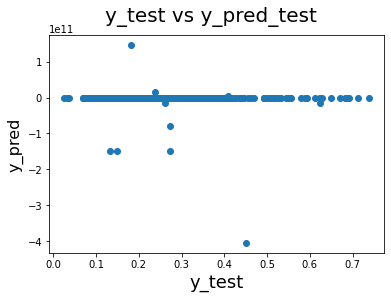

In [93]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)         # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [94]:
# Residual analysis
y_res = y_test - y_pred_test

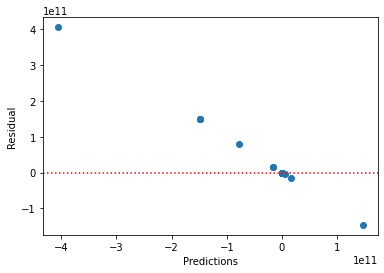

In [95]:
#data['res'] = y_res
plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

The above graph showing the non-linearity trend in the data.

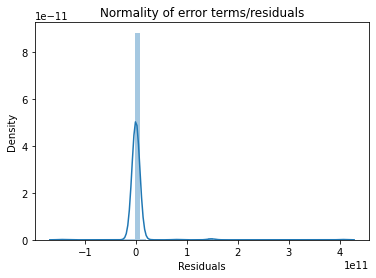

In [96]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Ridge and Lasso Regression

#### Ridge Regression

In [97]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [98]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [100]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.53740576e-03 -2.89862817e-02  2.85293297e-02  4.54232672e-02
  1.01091852e-01  5.76182040e-02  4.42699784e-02  1.86144249e-02
  1.90695132e-02  4.86235252e-02  2.84631330e-02  4.28339542e-02
  6.47983641e-02  6.54701835e-02 -1.68670365e-02  1.62820168e-01
  1.97340924e-02 -3.91100264e-03  3.43853992e-02  1.17304513e-02
 -7.76002027e-03 -1.50503961e-02  2.29448621e-02 -1.59108194e-03
  6.58939490e-02  2.15244824e-02  2.01254724e-02  4.36688776e-04
  3.87020689e-03  2.81265650e-02  1.73231214e-02  1.01867370e-02
 -6.29095293e-03 -5.92480593e-03  6.33556309e-03 -2.03537462e-03
 -1.40766130e-02  0.00000000e+00 -1.62832053e-03  1.60150794e-03
  2.90069206e-03  3.68953008e-04 -1.96098460e-02  4.48043604e-03
  0.00000000e+00  1.04075937e-02 -1.38736892e-02 -1.32651313e-03
 -2.16975795e-03  1.19624294e-03 -1.35813282e-02 -1.82721378e-03
  1.47588181e-02  3.79695917e-05 -2.20764095e-02 -9.55484734e-03
  3.37608460e-02 -2.63015007e-02 -2.11852313e-02 -1.28066667e-03
  2.81541580e-03 -2.56509

In [101]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9276877171474123
0.9188872587800544
0.9934704844391632
0.5918515708218695
0.0010751845069687912
0.0014908100020702


Text(0, 0.5, 'y_pred')

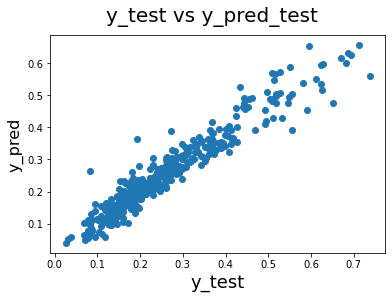

In [102]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [103]:
# Residual analysis
y_res = y_test - y_pred_test

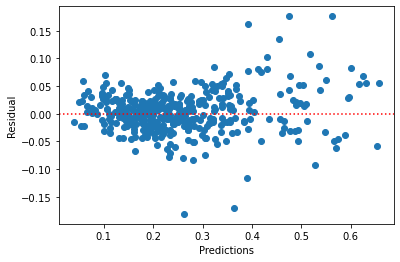

In [104]:
#data['res'] = y_res
plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

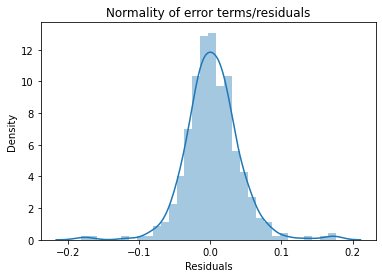

In [105]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

From the above 2 graphs, we can conclude that there is no non-linear trend in the data and the distribution of errors are normally distributed

#### Lasso

In [106]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [107]:
lasso = Lasso()


params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [109]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [110]:
lasso.coef_

array([-0.00000000e+00, -3.86750040e-02,  7.13819115e-03,  3.03219118e-02,
        1.19299335e-01,  7.03697297e-02,  6.56096794e-02,  1.14744773e-02,
        1.62293988e-02,  2.28315544e-02,  0.00000000e+00,  0.00000000e+00,
        7.31452110e-02,  8.10803814e-03, -2.65659256e-02,  2.83652606e-01,
        1.74878396e-02, -0.00000000e+00,  1.13550310e-02,  3.72930358e-03,
       -8.63424609e-03, -0.00000000e+00,  1.15177937e-02, -0.00000000e+00,
        6.09826136e-02,  2.11566259e-02,  1.66241758e-02,  0.00000000e+00,
        0.00000000e+00,  2.76724586e-02,  0.00000000e+00,  0.00000000e+00,
       -5.80156931e-03, -3.97702026e-03,  0.00000000e+00, -0.00000000e+00,
       -8.21114918e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.26187581e-03,  0.00000000e+00, -9.23019502e-03,  4.98295616e-03,
        0.00000000e+00,  8.67772041e-03, -7.32568722e-03, -0.00000000e+00,
       -7.90869485e-04,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.79938297e-03,  

In [111]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0387
1,LotFrontage,0.0071
2,LotArea,0.0303
3,OverallQual,0.1193
4,OverallCond,0.0704
...,...,...
104,GarageQual_No Garage,0.0005
105,SaleType_CWD,0.0382
106,SaleType_WD,-0.0053
107,SaleCondition_Normal,0.0105


In [112]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9250651428203509
0.9186534880075455
1.029501018732966
0.5935573151579712
0.0011141785917023442
0.0014951065872996754


Text(0, 0.5, 'y_pred')

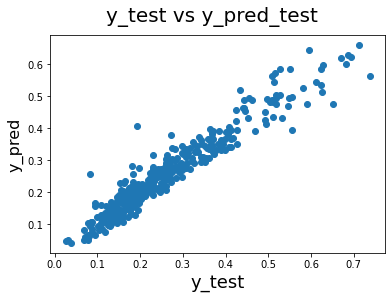

In [113]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [114]:
# Residual analysis
y_res = y_test - y_pred_test

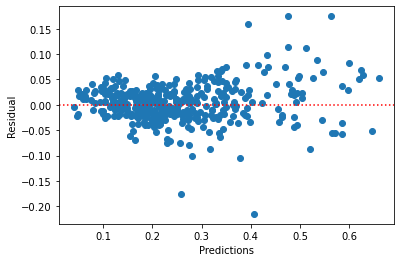

In [115]:
#data['res'] = y_res
plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

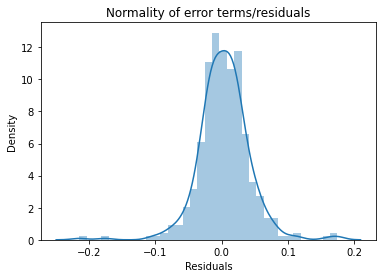

In [116]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

From the above 2 graphs, we can conclude that there is no non-linear trend in the data and the distribution of errors are normally distributed

In [117]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.140164e-01,0.927688,0.925065
1,R2 Score (Test),-3.546776e+22,0.918887,0.918653
2,RSS (Train),1.181295e+00,0.993470,1.029501
3,RSS (Test),2.587959e+23,0.591852,0.593557
4,MSE (Train),3.575553e-02,0.032790,0.033379
5,MSE (Test),2.553192e+10,0.038611,0.038667


#### Lets observe the changes in the coefficients after regularization

In [118]:
betas = pd.DataFrame(index=X.columns)

In [119]:
betas.rows = X.columns

In [120]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [121]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Linear,Ridge,Lasso
Id,2.263559e-03,0.001537,-0.000000e+00
MSSubClass,7.097552e-03,-0.028986,-3.867500e-02
LotFrontage,4.973488e-02,0.028529,7.138191e-03
LotArea,4.441035e-02,0.045423,3.032191e-02
OverallQual,1.207298e-01,0.101092,1.192993e-01
OverallCond,8.679374e-02,0.057618,7.036973e-02
YearBuilt,1.165547e-01,0.044270,6.560968e-02
YearRemodAdd,1.625029e-02,0.018614,1.147448e-02
MasVnrArea,1.565748e-02,0.019070,1.622940e-02
BsmtFinSF1,-2.768570e+11,0.048624,2.283155e-02


#### <span style='color:Blue'> 2nd Method: Will first select the no. of features for a linear regression model using RFE and then will check if regularisation technique is needed and also will check the r2  </span>

### RFE
Recursive feature elimination

In [122]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [123]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [124]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [125]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Id', False, 159),
 ('MSSubClass', False, 177),
 ('LotFrontage', False, 40),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 83),
 ('MasVnrArea', False, 62),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 58),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 11),
 ('BsmtHalfBath', False, 158),
 ('FullBath', False, 26),
 ('HalfBath', False, 131),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 80),
 ('GarageYrBlt', False, 78),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 30),
 ('OpenPorchSF', False, 170),
 ('EnclosedPorch', False, 147),
 ('3SsnPorch', False, 137),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 79),
 ('MoSold', False, 86),
 ('YrSold', False, 85),
 ('MSZoning_RH', False, 127),
 ('MSZoning_RL', False, 110),
 ('MSZoning_RM', False,

In [126]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'ScreenPorch', 'PoolArea',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_RRAe', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Unf',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType2_No Basement',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'GarageFinish_No Garage', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_No Garage', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'SaleType_CWD', 'SaleCondition_Pa

In [127]:
X_train.columns[~rfe.support_]

Index(['Id', 'MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=183)

### Building model using statsmodel, for the detailed statistics

In [128]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [129]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [130]:
X_train_rfe.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'ScreenPorch', 'PoolArea',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_RRAe', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Unf',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType2_No Basement',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'GarageFinish_No Garage', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_No Garage', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'SaleType_CWD', 'SaleCondition_Pa

### Model Building and Evaluation

### Ridge Regression

In [132]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [134]:
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = 1.0
ridge = Ridge(alpha=alpha)

In [135]:
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.03585098  0.1394714   0.08499927  0.10846181  0.05936283  0.02437422
  0.0267662   0.05719625 -0.03550335  0.27944189 -0.02189987 -0.04344591
  0.07413722  0.02924356  0.0235873   0.05501929  0.05677778  0.05041729
  0.07974538 -0.03591788 -0.03302105 -0.0394148  -0.03285514 -0.02816115
 -0.03792515 -0.00191712 -0.00191712 -0.04631092 -0.03614644 -0.0051559
 -0.03786323 -0.0051559   0.02946829 -0.0051559  -0.05789729 -0.05763201
 -0.07043383 -0.07091677  0.0065197  -0.00962975  0.00644504  0.0065197
 -0.01510835  0.00428847 -0.0007232  -0.01237052  0.00286686 -0.00377773
  0.04261779  0.04042219]


In [136]:
#Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_2_rfe = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_2_rfe.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_2_rfe.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_2_rfe.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_2_rfe.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_2_rfe.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_2_rfe.append(mse_test_lr**0.5)



0.9064475414978737
0.9045597731615945
1.285281042199268
0.6963942695604002
0.0013909967989169567
0.0017541417369279601


In [137]:
metric_2_rfe

[0.9064475414978737,
 0.9045597731615945,
 1.285281042199268,
 0.6963942695604002,
 0.03729606948348521,
 0.04188247529609443]

Text(0, 0.5, 'y_pred')

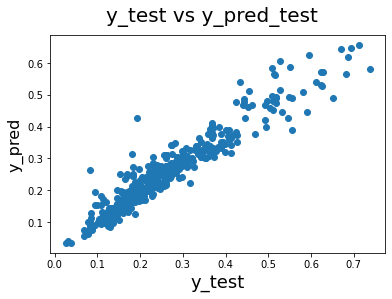

In [138]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

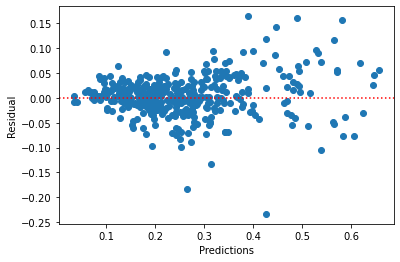

In [139]:
# Residual analysis
y_res = y_test - y_pred_test

#data['res'] = y_res
plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

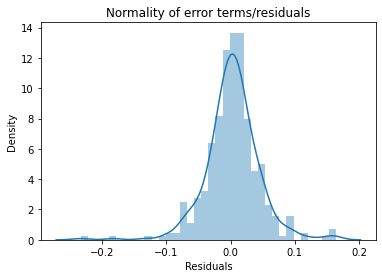

In [140]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lasso Regression

In [141]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [142]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [143]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [144]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)


[ 2.73976375e-02  1.44267090e-01  8.96537331e-02  1.19104638e-01
  4.22161560e-02  0.00000000e+00  0.00000000e+00  1.00003178e-01
 -2.84505775e-02  3.01697331e-01 -2.53257325e-02 -3.85952772e-02
  6.54393600e-02  2.62707530e-02  0.00000000e+00  5.27435065e-02
  5.12757786e-02  4.92208632e-02  7.75084346e-02 -3.03242844e-02
 -3.54781253e-02 -3.86898622e-02 -3.06872675e-02 -1.29473327e-02
 -9.09372917e-03 -0.00000000e+00 -0.00000000e+00 -3.33211724e-02
 -3.05685216e-02 -4.43213684e-04 -2.90524706e-02 -8.17070091e-04
  2.98172150e-02 -1.12303939e-05 -5.15187737e-02 -5.51935550e-02
 -6.64982244e-02 -4.84007642e-02  8.93509966e-03 -9.15081620e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.61569991e-02  4.12301086e-02]


In [145]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0274
1,OverallQual,0.1443
2,OverallCond,0.0897
3,YearBuilt,0.1191
4,BsmtFinSF1,0.0422
5,TotalBsmtSF,0.1000
6,LowQualFinSF,-0.0285
7,GrLivArea,0.3017
8,BedroomAbvGr,-0.0253
9,KitchenAbvGr,-0.0386


In [146]:
#Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_3_rfe = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_3_rfe.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_3_rfe.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_3_rfe.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_3_rfe.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_3_rfe.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_3_rfe.append(mse_test_lr**0.5)



0.9052723186422156
0.9061116903013758
1.3014269744486304
0.6850704678598227
0.0014084707515677817
0.0017256183069516945


In [147]:
metric_3_rfe

[0.9052723186422156,
 0.9061116903013758,
 1.3014269744486304,
 0.6850704678598227,
 0.037529598340080614,
 0.041540562188681254]

Text(0, 0.5, 'y_pred')

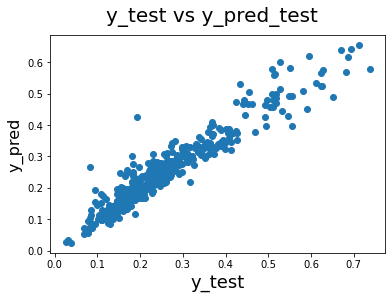

In [148]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

### Model Evaluation

Text(0, 0.5, 'y_pred')

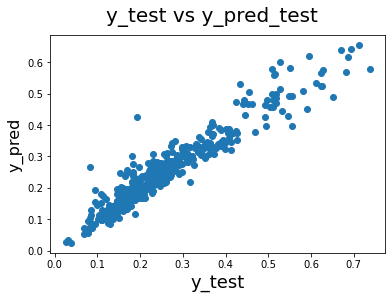

In [149]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [150]:
# Residual analysis
y_res = y_test - y_pred_test

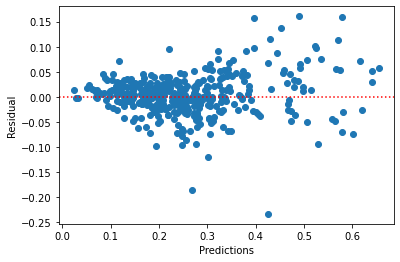

In [151]:
#data['res'] = y_res
plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

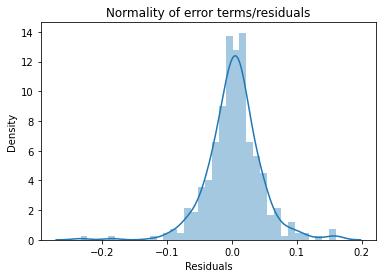

In [152]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

From the above 2 graphs, we can conclude that there is no non-linear trend in the data and the distribution of errors are normally distributed

In [153]:
# Creating a table which contain all the metrics -  USING RFE 

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric
        }
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(metric_2_rfe, name = 'Ridge Regression')
ls_metric = pd.Series(metric_3_rfe, name = 'Lasso Regression')

final_metric_rfe = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric_rfe

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.906448,0.905272
1,R2 Score (Test),0.904560,0.906112
2,RSS (Train),1.285281,1.301427
3,RSS (Test),0.696394,0.685070
4,MSE (Train),0.037296,0.037530
5,MSE (Test),0.041882,0.041541


#### <span style='color:Red'> The above table shows Ridge & Lasso Regression model performance after RFE  </span>

In [154]:
# Creating a table which contain all the metrics - Considering all the variables

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.140164e-01,0.927688,0.925065
1,R2 Score (Test),-3.546776e+22,0.918887,0.918653
2,RSS (Train),1.181295e+00,0.993470,1.029501
3,RSS (Test),2.587959e+23,0.591852,0.593557
4,MSE (Train),3.575553e-02,0.032790,0.033379
5,MSE (Test),2.553192e+10,0.038611,0.038667


#### <span style='color:Red'> Created above table - Considering all the variables (without using feature selection technique i.e. RFE) </span>

# <span style='color:Blue'> Conclusion </span>

The optimal value of lambda for ridge and lasso regression are:
Ridge: 1.0  (after rfe);
Ridge: 2.0  (when considered all the variables)
Lasso: 0.0001

The r-squared in case of Ridge and Lasso (w/o RFE) are:
Ridge: 
R2 Score (Train) - 0.9276
R2 Score (Test) - 0.9188
Lasso: 
R2 Score (Train) - 0.9250
R2 Score (Test) - 0.9186

The r-squared in case of Ridge and Lasso using RFE are:
Ridge: 
R2 Score (Train) - 0.9064
R2 Score (Test) - 0.9045
Lasso: 
R2 Score (Train) - 0.9052
R2 Score (Test) - 0.9061

Key points:
1. Since Lasso helps in feature reduction, Lasso has a better edge over Ridge.
2. Since Lasso R2 with and w/o using RFE do not show much difference. Initially, Lasso selected 109 variables. After rfe, it has selected just 36 variable and also reduced the complexity of the model. Therefore, Lasso w/ rfe is the better model.

Hence based on Lasso w/ rfe, the factors that generally affect the price are the Lot area, Overall quality and condition of the house, Original construction date, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area.
Therefore, the variables predicted by Lasso in the below list are the significant variables for predicting the price of a house.

In [155]:
lasso_df['Features'] 

0                    LotArea
1                OverallQual
2                OverallCond
3                  YearBuilt
4                 BsmtFinSF1
5                TotalBsmtSF
6               LowQualFinSF
7                  GrLivArea
8               BedroomAbvGr
9               KitchenAbvGr
10                GarageCars
11               ScreenPorch
12      Neighborhood_Crawfor
13      Neighborhood_NoRidge
14      Neighborhood_NridgHt
15      Neighborhood_StoneBr
16           Condition1_RRAe
17           BldgType_Duplex
18            BldgType_Twnhs
19           BldgType_TwnhsE
20         HouseStyle_2.5Unf
21       Exterior1st_BrkComm
22               BsmtQual_Fa
23               BsmtQual_Gd
24      BsmtQual_No Basement
25               BsmtQual_TA
26      BsmtCond_No Basement
27           BsmtExposure_Gd
28            KitchenQual_Fa
29            KitchenQual_Gd
30            KitchenQual_TA
31            Functional_Sev
32    GarageFinish_No Garage
33             GarageQual_Fa
34            